In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from pathlib import Path


%matplotlib inline 

In [2]:
data_folder = Path.cwd().parent / "data/data_kmeans.parquet"


In [3]:
dataset = pd.read_parquet(data_folder)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207095 entries, 0 to 207094
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   vin                     207095 non-null  object
 1   visitas                 207095 non-null  int64 
 2   antiquity               207095 non-null  int64 
 3   ultimo_kilometraje      207095 non-null  int64 
 4   num_servicios           207095 non-null  int64 
 5   num_rep_llantas         207095 non-null  int64 
 6   num_rep_frenos          207095 non-null  int64 
 7   num_rep_amortiguadores  207095 non-null  int64 
 8   num_rep_transmision     207095 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 15.8+ MB


In [5]:
dataset.head()

,vin,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,3KPC24B10JE010685,2,73,77458,2,0,0,0,0
1,3KPC24B10JE010735,1,77,59798,2,0,0,0,0
2,3KPC24B10JE010797,2,75,61193,1,0,3,0,0
3,3KPC24B10JE010833,1,77,125438,0,0,0,0,0
4,3KPC24B10JE012999,4,75,89542,11,4,0,0,0


In [7]:
grand_i10_variables = dataset.drop(['vin'], axis=1).drop(['antiquity'], axis=1)
grand_i10_variables.head()

,visitas,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,2,77458,2,0,0,0,0
1,1,59798,2,0,0,0,0
2,2,61193,1,0,3,0,0
3,1,125438,0,0,0,0,0
4,4,89542,11,4,0,0,0


In [8]:
grand_i10_variables.describe()

,visitas,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,207095.000000,2.070950e+05,207095.000000,207095.000000,207095.000000,207095.000000,207095.000000
mean,3.834916,8.671359e+04,5.175398,0.671904,0.195630,0.005162,0.056713
std,2.668895,4.505681e+06,6.177612,2.443746,0.747232,0.087993,0.473816
min,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.562500e+03,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.109500e+04,4.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,6.408100e+04,6.000000,0.000000,0.000000,0.000000,0.000000
max,35.000000,1.000000e+09,133.000000,54.000000,21.000000,5.000000,22.000000


### Normalizando los datos

In [9]:
data_normalizada = (grand_i10_variables-grand_i10_variables.min()) / (grand_i10_variables.max()-grand_i10_variables.min())
data_normalizada.describe()


,visitas,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,207095.000000,207095.000000,207095.000000,207095.000000,207095.000000,207095.000000,207095.000000
mean,0.083380,0.000087,0.038913,0.012443,0.009316,0.001032,0.002578
std,0.078497,0.004506,0.046448,0.045255,0.035582,0.017599,0.021537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029412,0.000009,0.015038,0.000000,0.000000,0.000000,0.000000
50%,0.058824,0.000031,0.030075,0.000000,0.000000,0.000000,0.000000
75%,0.117647,0.000064,0.045113,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Búsqueda de la cantidad optima de clusters
- calculo de la similitud de los individuos dentro de los clusters

In [12]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(data_normalizada)
    wcss.append(kmeans.inertia_)

### Gráfica del codo de Jambú

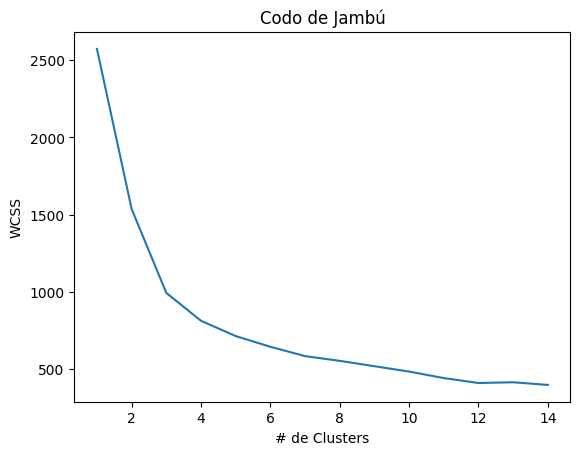

In [13]:
plt.plot(range(1,15), wcss)
plt.title("Codo de Jambú")
plt.xlabel("# de Clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(data_normalizada) ## Aplica el modelo a la base

KMeans(n_clusters=5)

In [15]:
print(clustering.inertia_)

737.73971295652


### Aquí se agrega la clasificación al archivo original

In [16]:
dataset["KMeans_Clustering"] = clustering.labels_
dataset.head()

,vin,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision,KMeans_Clustering
0,3KPC24B10JE010685,2,73,77458,2,0,0,0,0,4
1,3KPC24B10JE010735,1,77,59798,2,0,0,0,0,4
2,3KPC24B10JE010797,2,75,61193,1,0,3,0,0,4
3,3KPC24B10JE010833,1,77,125438,0,0,0,0,0,4
4,3KPC24B10JE012999,4,75,89542,11,4,0,0,0,0


### Visualizando los clusters
- Utilizando PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_normalizada)
pca_df = pd.DataFrame(data=pca_results, columns=["Componente_1", "Componente_2"])
pca_df_clusters = pd.concat([pca_df, dataset[["KMeans_Clustering"]]], axis=1)
#pca_df_clusters


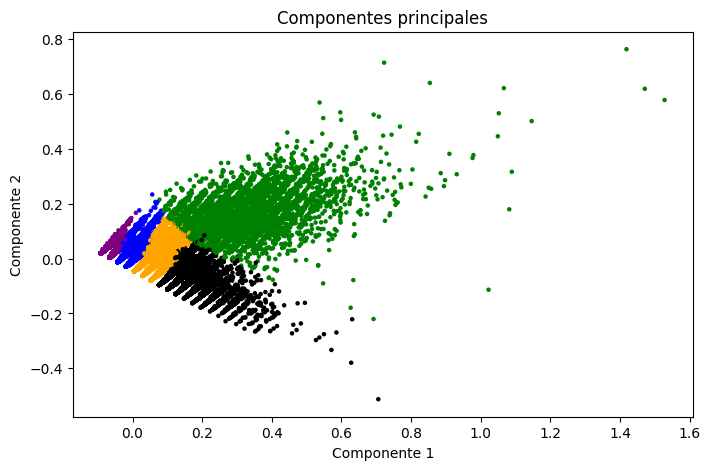

In [18]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_title("Componentes principales")

color_theme = np.array(["blue","green", "black","orange", "purple"])
ax.scatter(x=pca_df_clusters.Componente_1, y=pca_df_clusters.Componente_2,
          c=color_theme[pca_df_clusters.KMeans_Clustering], s=5)

plt.show()


In [19]:
dataset.to_csv("data/output_k_means.csv")

OSError: Cannot save file into a non-existent directory: 'data'